In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
with open('ultimate_data_challenge.json') as json_file:  
    data = json.load(json_file)

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


## 1.

In [5]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

### Adding indicator variables for users with missing data

In [6]:
df['No_driver_rating'] = 0
df.loc[df.avg_rating_of_driver.isnull(), 'No_driver_rating'] = 1

In [7]:
df['No_rating_bydriver'] = 0
df.loc[df.avg_rating_by_driver.isnull(), 'No_rating_bydriver'] = 1

In [8]:
df['phone_unknown'] = 0
df.loc[df.phone.isnull(), 'phone_unknown'] = 1

In [9]:
df.last_trip_date = pd.to_datetime(df.last_trip_date)

In [10]:
df.signup_date = pd.to_datetime(df.signup_date)

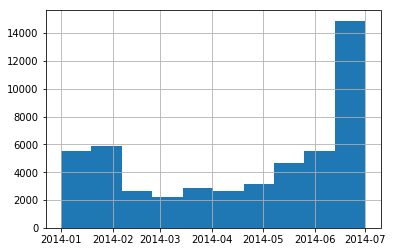

In [11]:
df.last_trip_date.hist()

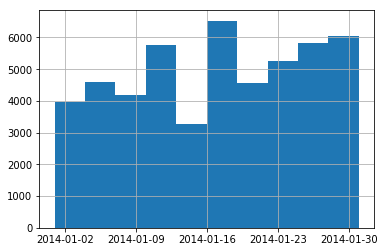

In [12]:
df.signup_date.hist()

In [13]:
# "last 30 days"
df.last_trip_date.max()

Timestamp('2014-07-01 00:00:00')

In [14]:
df['retained'] = 0
df.loc[df.last_trip_date >= '2014-06-02', 'retained'] = 1

In [15]:
df.avg_rating_by_driver = df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.mean())

In [16]:
df.avg_rating_of_driver = df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.mean())

### Percentage of user retention

In [17]:
retained_pct = df.retained.sum()/len(df.retained)*100
retained_pct

36.620000000000005

In [18]:
df = pd.get_dummies(df,columns=['city','phone','ultimate_black_user'])

## 2. 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, log_loss

In [20]:
y = df['retained']
X = df.drop(['retained','last_trip_date','signup_date'],axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=21)

In [39]:
logreg = LogisticRegression(penalty='l1')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
y_pred = logreg.predict(X_test)

In [41]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5427  893]
 [1861 1819]]
             precision    recall  f1-score   support

          0       0.74      0.86      0.80      6320
          1       0.67      0.49      0.57      3680

avg / total       0.72      0.72      0.71     10000



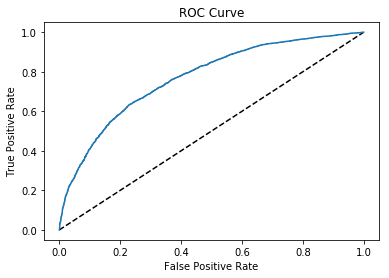

AUC: 0.7692394314116676


In [42]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

In [43]:
cv_auc = cross_val_score(logreg,X,y,cv=5,scoring='roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.77656258 0.77033186 0.76706308 0.7739375  0.78119061]


In [44]:
log_loss(y_test,y_pred_prob)

0.548331295033436

In [45]:
#model coefficients
Coefficients = pd.DataFrame()
Coefficients['features'] = X.columns
Coefficients['model_coefficients'] = np.transpose(logreg.coef_)
Coefficients

,features,model_coefficients
0,avg_dist,-0.032527
1,avg_rating_by_driver,-0.176778
2,avg_rating_of_driver,-0.051955
3,avg_surge,-0.149201
4,surge_pct,0.003681
5,trips_in_first_30_days,0.109416
6,weekday_pct,0.000594
7,No_driver_rating,-0.677674
8,No_rating_bydriver,-0.525623
9,phone_unknown,0.096056


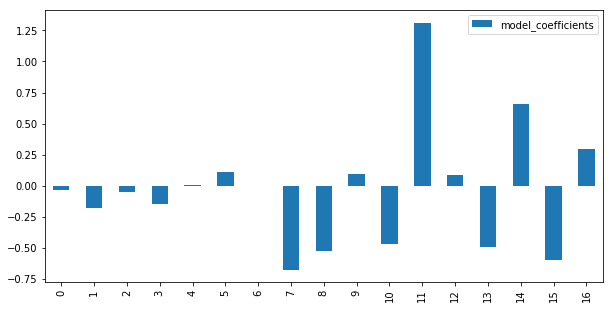

In [46]:
Coefficients.plot(kind='bar',figsize=(10,5))

#### I used logistic regression because it a robust proven method for modeling customer churn.  It also has the benefit of being pretty clear about each feature factors into the model which can be useful for analysis.  This model gives a ROC AUC of below 0.8 so it is not exceptionally accurate but the value has been cross validated and should provide a fairly robust baseline prediction.

## 3.

#### Upon examining the model coefficients, seems that by far the 3 biggest postive predictors of customer retention are being in the city of King's Landing, being an iphone user, and having used Ultimate black.  The 3 biggest predictors of customer churn are not having given the driver a rating, not having been rated by a driver, and not having tried Ultimate black.  

#### I would suggest that if the company got more customers to try Ultimate black they may seen an increase in retention.  Also maybe tilt advertiser efforts towards android users over iphone users and make it easier to provide ratings.